In [1]:
from src.preprocess import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM
from tensorflow.keras.utils import to_categorical
#import wandb
#from wandb.keras import WandbCallback
import matplotlib.pyplot as plt

2022-04-20 10:42:15.159247: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [16]:
max_len = 40
buckets = 100

# Save data to array file first
save_data_to_array(max_len=max_len, n_mfcc=buckets)

labels=["aurrera", "walmart", "chedraui"]

Saving vectors of label - 'aurrera': 100%|██████████| 3/3 [00:00<00:00, 40.54it/s]


In [18]:
# # Loading train set and test set
X_train, X_test, y_train, y_test = get_train_test()

In [19]:
X_train.shape

(5, 100, 40)

In [20]:
# # Feature dimension
channels = 1
epochs = 50
batch_size = 100

num_classes = 3

X_train = X_train.reshape(X_train.shape[0], buckets, max_len, channels)
X_test = X_test.reshape(X_test.shape[0], buckets, max_len, channels)

0.0


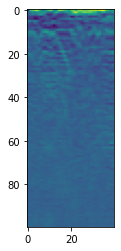

In [28]:
plt.imshow(X_train[1, :, :, 0])
print(y_train[1])